# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 3 - 9/25/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>
### <p style="text-align: center;"> rjc2737 and kjy252</p>


![](http://i.markdownnotes.com/image_KBazLVB.png)

## Answers

### 1. 
A vector inside S (different from $v_1, v_2, v_3, v_4$) is the vector [2,4,6,8].
This is achieved by simply scaling $v_1$ by 2.

In [25]:
import numpy as np
import scipy.linalg as la
import sympy
from numpy import matrix, rank
S= np.array([[1,2,3,4],
             [0,1,0,1],
             [1,4,3,6],
             [2,11,6,15]])

q,r = np.linalg.qr(S)

sol = (np.array([2,4,6,8]))

la.solve(q,sol)

array([-9.79795897, -2.3763541 , -0.25928149, -4.27617987])

We can verify that [2,4,6,8] by decomposing the $v_1, v_2, v_3, v_4$ into their orthogonal basis.
If we can represent [2,4,6,8] as a linear solution to the orthogonal basis, then [2,4,6,8] is in the subspace.

Above, we use scipy's linalg solver to verify that there is a solution with coefficients array([-9.79795897, -2.3763541 , -0.25928149, -4.27617987]) 

In [12]:
print "The rank of our matrix is " + str(np.ndim(S))

The rank of our matrix is 2


Knowing that the dimension of the subspace is 2 (and the rank is 2), we know that there are only two linearly indepenent variables in this space.

As a result, the identity matrix:

$\begin{bmatrix}
    1 & 0 &  0 & 0 \\
    0 & 1 &  0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
\end{bmatrix} $

is a vector not in S since it's dimension and rank is 4.

## 2.

In [29]:
print "The rank of our matrix is " + str(np.ndim(S))

sympy.Matrix([[1,2,3,4],
             [0,1,0,1],
             [1,4,3,6],
             [2,11,6,15]]).rref()[0]

The rank of our matrix is 2


Matrix([
[1, 0, 3, 2],
[0, 1, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0]])

### 3.
Using QR decomposition, we find an orthnormal basis below

In [16]:
q,r = np.linalg.qr(S)
print "Orthnormal Basis"
print q

Orthnormal Basis
[[-0.40824829  0.79211803  0.45374261  0.        ]
 [-0.         -0.29704426  0.51856298 -0.80178373]
 [-0.40824829  0.19802951 -0.7130241  -0.53452248]
 [-0.81649658 -0.49507377  0.12964074  0.26726124]]


## 4.
Using the closed form solution of the cost function, we an use the normal equation to optimally solve for our coefficient beta to minimize the error.

y = [1, 0, 0, 0] (the target we are trying to achieve
meanwhile, X is the row reduced echelong form of our known vector

In [37]:
y = np.matrix('1; 0; 0; 0')
X = np.matrix('1 0; 0 1; 3 0; 2 1')
XT = np.matrix.transpose(X)
A = np.dot(XT, X)
Ainv = np.linalg.inv(A)
B = np.dot(Ainv,XT)
beta = np.dot(B,y)
print "The coefficients, beta are"
print beta

The coefficients, beta are
[[ 0.08333333]
 [-0.08333333]]


The coefficients of v1 and v2 to solve the linear system of equation is 
$y = 0.083x_1 - 0.083x_2$

![](http://i.markdownnotes.com/image_yVAcZ2O.png)

http://proceedings.mlr.press/v70/achab17a/achab17a.pdf


In [44]:
x

In [19]:
import os
import nltk
from collections import Counter
from nltk.corpus import wordnet

c, directory = Counter(), "C:/Users/kevjy/Documents/Fall2017/EE379K/Labs/DSLab/Lab3/scrapedTXT/"


for x in os.listdir(directory):
    fname = os.path.join(directory, x)
    if os.path.isfile(fname):
        with open(fname) as f:
            wordList = f.read().split()
            englishList = []
            for word in wordList:
                if word.isalpha():
                    englishList.append(word)
            c += Counter(englishList)

for word, _ in c.most_common(10):
    print(word, c[word])

('the', 135079)
('of', 75084)
('and', 65208)
('to', 47216)
('a', 44558)
('is', 39589)
('in', 37988)
('for', 31734)
('that', 23932)
('we', 22222)


In [24]:
#for every word in our counter, find the total number of words and find probability distribution of each
totalCount = 0;
for word in c:
    totalCount += c[word]

print totalCount

wordMap = {}
for word in c:
    wordMap[word] = float(c[word])/totalCount


2028254


![](http://i.markdownnotes.com/image_3J0FdJo.png)

In [30]:
import math
totalEntropy = 0
for word in c:
    totalEntropy += (wordMap[word]*math.log(wordMap[word],2))
print totalEntropy * -1

9.96982265121


![](http://i.markdownnotes.com/image_TWj4ap5.png)

#### Trying out a linear model:
Following a guide from https://www.kaggle.com/apapiu/regularized-linear-models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [4]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))


## Data preprocessing:
We're not going to do anything fancy here:
* First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal 

* Create Dummy variables for the categorical features 

* Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C12FA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C228BA8>]], dtype=object)

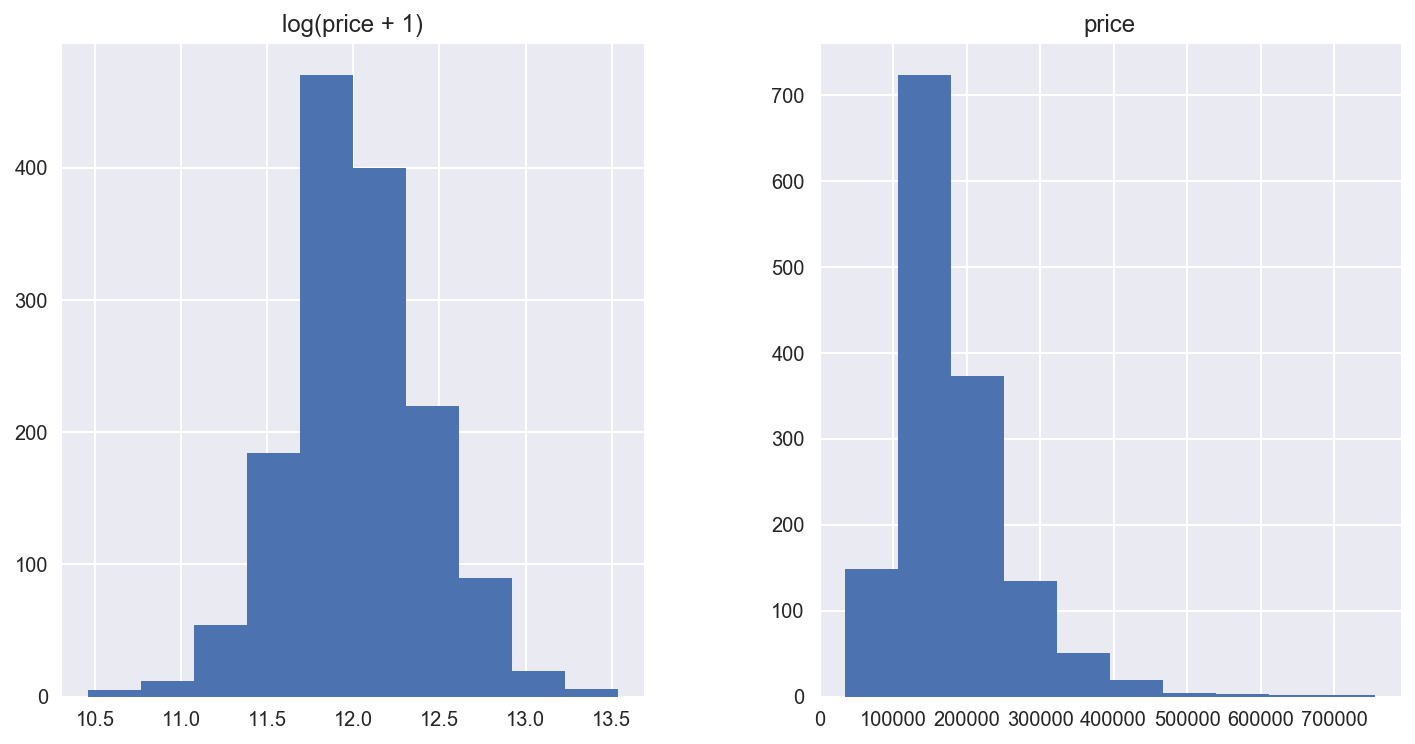

In [9]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()